In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2   
import itertools
plt.style.use('style.mplstyle')

#Load Data
#NH
x_NH_prof=np.load("Output/x_NH_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
L_NH_prof=np.load("Output/Like_NH_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
x_NH=np.load("Output/x_NH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
y_NH=np.load("Output/y_NH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
L_NH=np.load("Output/Like_NH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
m_NH_Energy_Hierarchy_BF=np.load("Output/BF_NH_TI.npy",allow_pickle=True)
#m_NH_Energy_Hierarchy_BF_like=np.load("Output/BF_like_NH_TI.npy",allow_pickle=True)

#IH
x_IH_prof=np.load("Output/x_IH_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
L_IH_prof=np.load("Output/Like_IH_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
x_IH=np.load("Output/x_IH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
y_IH=np.load("Output/y_IH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
L_IH=np.load("Output/Like_IH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
m_IH_Energy_Hierarchy_BF=np.load("Output/BF_IH_TI.npy",allow_pickle=True)
#m_IH_Energy_Hierarchy_BF_like=np.load("Output/BF_like_IH_TI.npy",allow_pickle=True)

#Pee
x_Pee_prof=np.load("Output/x_Pee_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
L_Pee_prof=np.load("Output/Like_Pee_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
x_Pee=np.load("Output/x_Pee_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
y_Pee=np.load("Output/y_Pee_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
L_Pee=np.load("Output/Like_Pee_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
m_Pee_Energy_Hierarchy_BF=np.load("Output/BF_Pee_TI.npy",allow_pickle=True)
#m_Pee_Energy_Hierarchy_BF_like=np.load("Output/BF_like_Pee_TI.npy",allow_pickle=True)


In [2]:
E_0_e,L_e,alpha_e,E_0_x,L_x,alpha_x,Pee=4.2,44,2.3,14.9,8,2.3,0.5
E_0_e_i,E_0_e_f=3,30
L_e_i,L_e_f=1.5,45
E_0_x_i,E_0_x_f=3,30
L_x_i,L_x_f=1.5,45
alpha_i,alpha_f=2,3
Pee_i,Pee_f=0,1

params_index=[0,1,3,4]
params_lim=[(E_0_e_i,E_0_e_f),(L_e_i,L_e_f),(E_0_x_i,E_0_x_f),(L_x_i,L_x_f)]
params_label=[r"$\overline{E}_e$ [MeV]",r"$\varepsilon_e$ [$10^{52}$ ergs]",
              r"$\overline{E}_x$ [MeV]",r"$\varepsilon_x$ [$10^{52}$ ergs]"]

/tmp/ipykernel_690101/226564376.py:62: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(ax[1,0],labels=["IH","NH","Pee","Best Fit - IH","Best Fit - NH","Best Fit - Pee"],loc="upper center", bbox_to_anchor=(0.33, 0., 0.1, .999),fontsize=28)


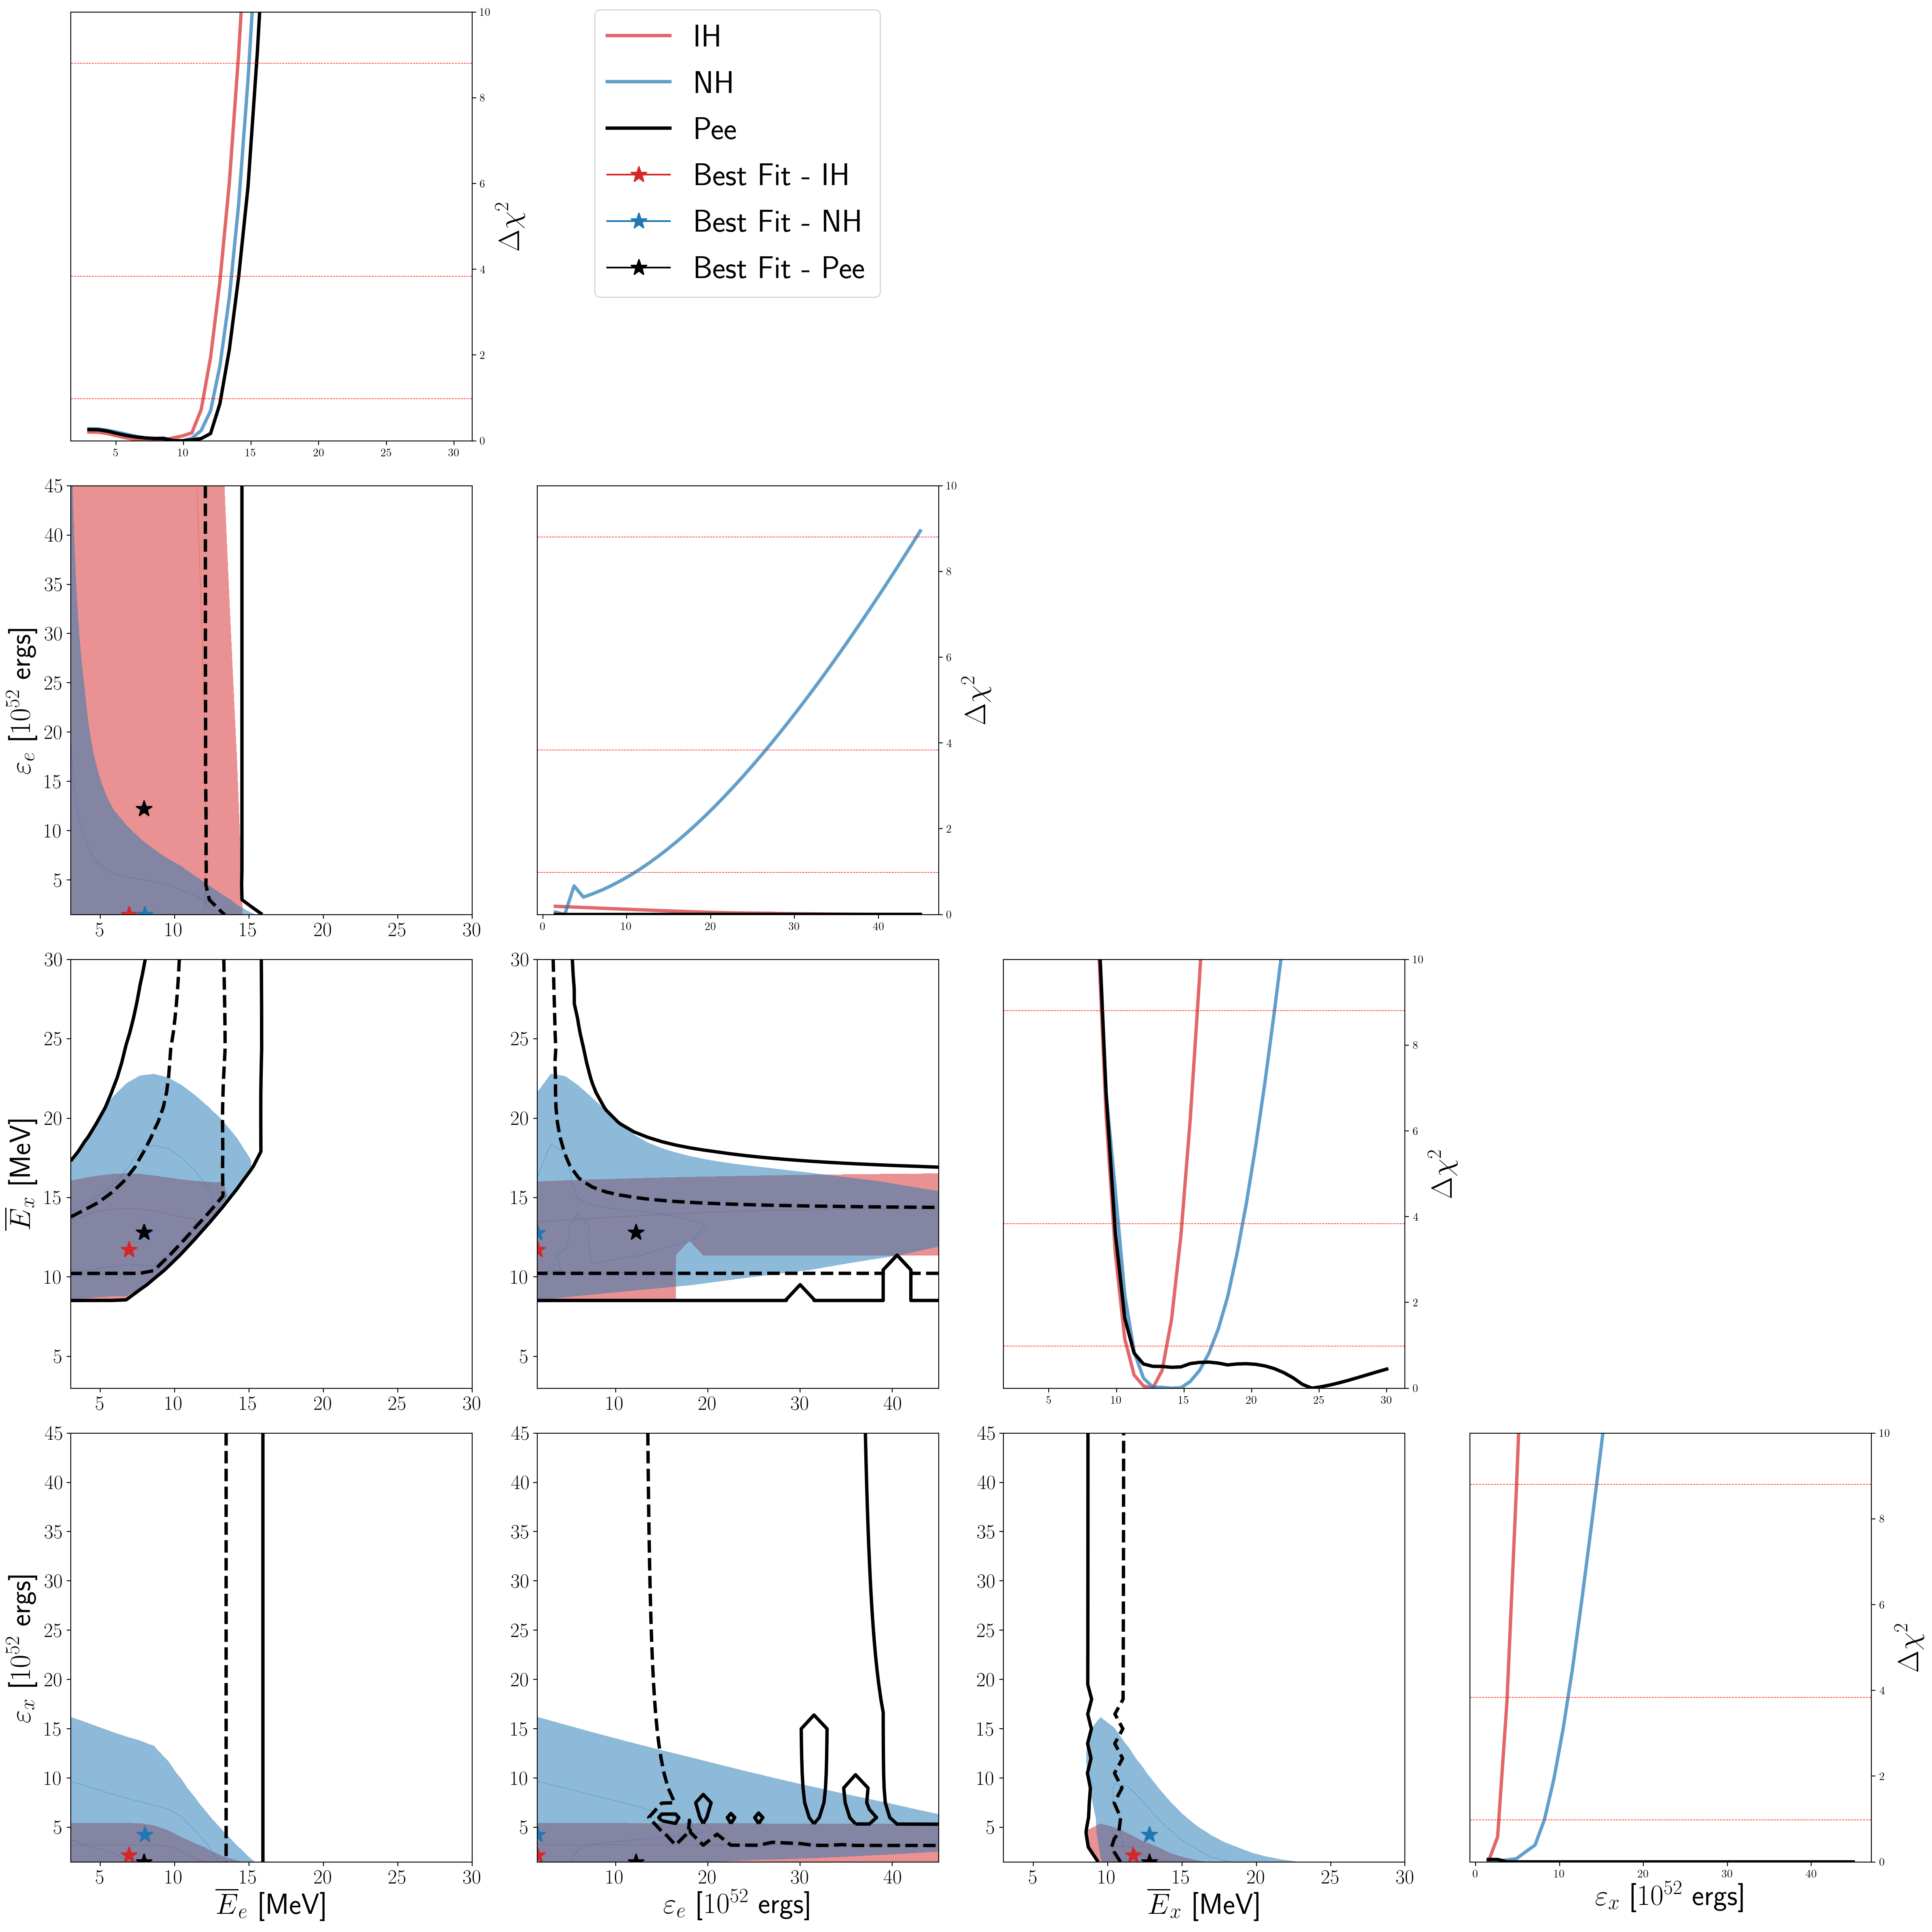

In [3]:
from functools import reduce

num_param=len(params_index)
font=26
lw=3

fig, ax = plt.subplots(figsize=(24, 24), ncols=num_param, nrows=num_param,dpi=200)
for i in range(num_param):
    for j in range(num_param):
        if i<j:
            fig.delaxes(ax[i, j])
            
for i in range(len(params_index)):
    ax_aux=ax[i,i]
    if i!=-1:
        ax_aux.plot(x_IH_prof[i],L_IH_prof[i],ls="-",c="tab:red", label='IH',lw=lw,alpha=0.7) 
        ax_aux.plot(x_NH_prof[i],L_NH_prof[i],ls="-",c="tab:blue", label='NH',lw=lw,alpha=0.7) 
        ax_aux.plot(x_Pee_prof[i],L_Pee_prof[i],ls="-",c="k", label='Pee',lw=lw)
        ax_aux.axhline(y=chi2.ppf(0.68, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axhline(y=chi2.ppf(0.95, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axhline(y=chi2.ppf(0.997, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.set_ylim(0,10)
        ax_aux.set_ylabel(r"$\Delta \chi^2$",fontsize=font)
        ax_aux.yaxis.set_label_position("right")
        ax_aux.yaxis.tick_right()
        if i==num_param-1:
            ax_aux.set_xlabel(params_label[i],fontsize=font)
        
    else:
        ax_aux.plot(L_NH_prof[i],x_NH_prof[i],c='b', label='NH',lw=lw)
        ax_aux.plot(L_IH_prof[i],x_IH_prof[i],c='orange', label='IH',lw=lw)
        ax_aux.plot(L_Pee_prof[i],x_Pee_prof[i],c='g', label='Pee',lw=lw)
        ax_aux.axvline(chi2.ppf(0.68, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axvline(chi2.ppf(0.95, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axvline(chi2.ppf(0.997, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.set_xlim(0,10)

l=0
levels=[chi2.ppf(0, 2),chi2.ppf(0.68, 2),chi2.ppf(0.997, 2)]
levels_cont=[chi2.ppf(0.90, 2)]
for i,j in itertools.combinations(range(num_param), 2):
    ax_aux=ax[j,i]
    k=0   
    #IH    
    ax_aux.contourf(x_IH[l][k],y_IH[l][k],np.transpose(L_IH[l][k]), levels=levels,colors="tab:red",alpha=0.5)
    ax_aux.plot(m_IH_Energy_Hierarchy_BF[params_index[i]],m_IH_Energy_Hierarchy_BF[params_index[j]],marker="*",label="Best Fit - IH", markersize=15,color="tab:red")
    #NH
    ax_aux.contourf(x_NH[l][k],y_NH[l][k],np.transpose(L_NH[l][k]), levels=levels,colors="tab:blue",alpha=0.5)
    ax_aux.plot(m_NH_Energy_Hierarchy_BF[params_index[i]],m_NH_Energy_Hierarchy_BF[params_index[j]],marker="*",label="Best Fit - NH", markersize=15,color="tab:blue")
    #Pee
    L_Pee_aux = reduce(np.minimum, (L_Pee[l][k],L_IH[l][k]))
    ax_aux.contour(x_Pee[l][k],y_Pee[l][k],np.transpose(L_Pee_aux),linewidths=lw, levels=levels,linestyles=["-","--"],colors='k')
    ax_aux.plot(m_Pee_Energy_Hierarchy_BF[params_index[i]],m_Pee_Energy_Hierarchy_BF[params_index[j]],marker="*",label="Best Fit - Pee", markersize=15,color="k")
    if i==0:
        ax_aux.set_ylabel(params_label[j],fontsize=font)
    if j==num_param-1:
        ax_aux.set_xlabel(params_label[i],fontsize=font)
    
    ax_aux.tick_params(axis='both', which='major', labelsize=18)
    l=l+1

fig.legend(ax[1,0],labels=["IH","NH","Pee","Best Fit - IH","Best Fit - NH","Best Fit - Pee"],loc="upper center", bbox_to_anchor=(0.33, 0., 0.1, .999),fontsize=28)
plt.tight_layout()
plt.savefig('plots_paper/Param_Triangle_Profile_Time_Integrated_filled.pdf', dpi=160)
plt.show()